## Load Procthor Maps 

npy files generated from https://colab.research.google.com/drive/1chCnblnmpbLsfTvvnJxeETFXuaSDUyr3

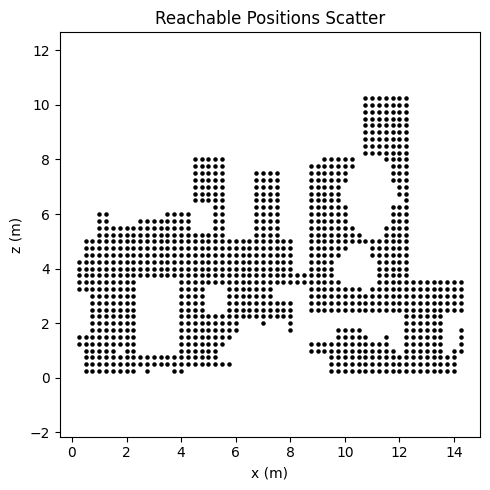

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# Configuration
# ==========================================
INPUT_FILE = r"C:\Users\HP\Downloads\house_000003.npy"  # path to your saved file

# ==========================================
# Load and plot
# ==========================================
positions = np.load(INPUT_FILE)

xs, zs = positions[:, 0], positions[:, 2]

plt.figure(figsize=(5, 5))
plt.scatter(xs, zs, s=5, c='black')
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.title("Reachable Positions Scatter")
plt.axis("equal")
plt.tight_layout()
plt.show()


## Get Occupancy Grid 

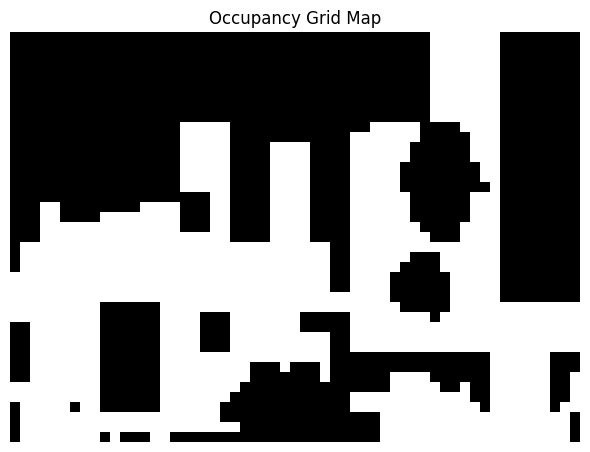

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# Configuration
# ==========================================
INPUT_FILE = r"C:\Users\HP\Downloads\house_000003.npy"
GRID_RES = 0.25  # meters per cell

# ==========================================
# Load reachable positions
# ==========================================
positions = np.load(INPUT_FILE)
xs, zs = positions[:, 0], positions[:, 2]

# ==========================================
# Compute grid bounds
# ==========================================
min_x, max_x = xs.min(), xs.max()
min_z, max_z = zs.min(), zs.max()

w = int((max_x - min_x) / GRID_RES) + 1
h = int((max_z - min_z) / GRID_RES) + 1

# ==========================================
# Create occupancy grid
# ==========================================
grid = np.zeros((h, w), dtype=np.uint8)
for x, z in zip(xs, zs):
    xi = int((x - min_x) / GRID_RES)
    zi = int((z - min_z) / GRID_RES)
    grid[zi, xi] = 255  # walkable

# ==========================================
# Visualize
# ==========================================
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="gray", origin="lower")
plt.title("Occupancy Grid Map")
plt.axis("off")
plt.tight_layout()
plt.show()


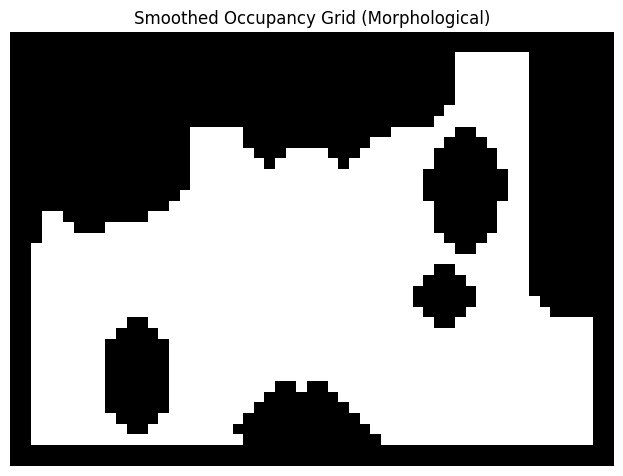

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion

# assume you already have `grid` (uint8, 0/255)
mask = grid > 0

# smooth: dilate then erode (closing)
smooth = binary_dilation(mask, iterations=2)
smooth = binary_erosion(smooth, iterations=2)

plt.imshow(smooth, cmap="gray", origin="lower")
plt.title("Smoothed Occupancy Grid (Morphological)")
plt.axis("off")
plt.tight_layout()
plt.show()
